In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [ ]:
claimants=pd.read_csv("/content/claimants.csv")
claimants.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [ ]:
claimants.shape

(1340, 7)

In [ ]:
claimants.drop(["CASENUM"],inplace=True,axis=1)

In [ ]:
claimants.shape

(1340, 6)

In [ ]:
claimants.info

<bound method DataFrame.info of       ATTORNEY  CLMSEX  CLMINSUR  SEATBELT  CLMAGE    LOSS
0            0     0.0       1.0       0.0    50.0  34.940
1            1     1.0       0.0       0.0    18.0   0.891
2            1     0.0       1.0       0.0     5.0   0.330
3            0     0.0       1.0       1.0    31.0   0.037
4            1     0.0       1.0       0.0    30.0   0.038
...        ...     ...       ...       ...     ...     ...
1335         1     0.0       1.0       0.0     NaN   0.576
1336         0     1.0       1.0       0.0    46.0   3.705
1337         1     1.0       1.0       0.0    39.0   0.099
1338         0     1.0       0.0       0.0     8.0   3.177
1339         1     1.0       1.0       0.0    30.0   0.688

[1340 rows x 6 columns]>

In [ ]:
claimants=claimants.dropna()
claimants.shape

(1096, 6)

In [ ]:
claimants.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


In [ ]:
X=claimants.iloc[:,1:]
Y=claimants.iloc[:,0]

In [ ]:
classifier=LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [ ]:
y_pred=classifier.predict(X)
y_pred

array([0, 1, 1, ..., 1, 0, 1])

In [ ]:
y_pred_df=pd.DataFrame({"actual":Y,
                        "predicted_prob":classifier.predict(X)})
y_pred_df

,actual,predicted_prob
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
1334,1,1
1336,0,0
1337,1,1
1338,0,0


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(Y,y_pred)
print(confusion_matrix)

[[381 197]
 [123 395]]


In [ ]:
((381+395)/(381+197+123+395))*100 #Accuracy

70.8029197080292

# ROC Curve

<function matplotlib.pyplot.show(close=None, block=None)>

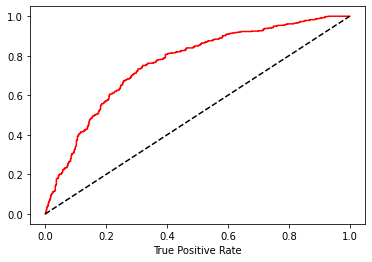

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr,tpr,thresholds=roc_curve(Y,classifier.predict_proba(X)[:,1])
auc=roc_auc_score(Y,y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color="red")
plt.plot([0,1],[0,1],"k--")
plt.xlabel("False Positive Rate or [1-True Negative Rate]")
plt.xlabel("True Positive Rate")
plt.show


In [ ]:
auc

0.7108589063606365